### Employee promotion Analysis and Prediction

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("D:/GUVI/project3/Employee-Attrition - Employee-Attrition.csv")  
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
df.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


#### Data preprocessing and cleaning

In [4]:
df.shape

(1470, 35)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [7]:
df.columns.tolist()

['Age',
 'Attrition',
 'BusinessTravel',
 'DailyRate',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'Gender',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'Over18',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [8]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [9]:
df.isnull().sum().sum()

np.int64(0)

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [12]:
# List of constant or irrelevant columns
cols_to_drop = ['EmployeeNumber', 'Over18',  'EmployeeCount', 'StandardHours']

# Drop them from the DataFrame
df = df.drop(columns=cols_to_drop)

# Confirm they are dropped
print(df.columns)


Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


In [13]:
df.shape

(1470, 31)

#### EDA

In [14]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("Numerical columns:", list(numerical_cols))
print("Count:", len(numerical_cols))


Numerical columns: ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
Count: 23


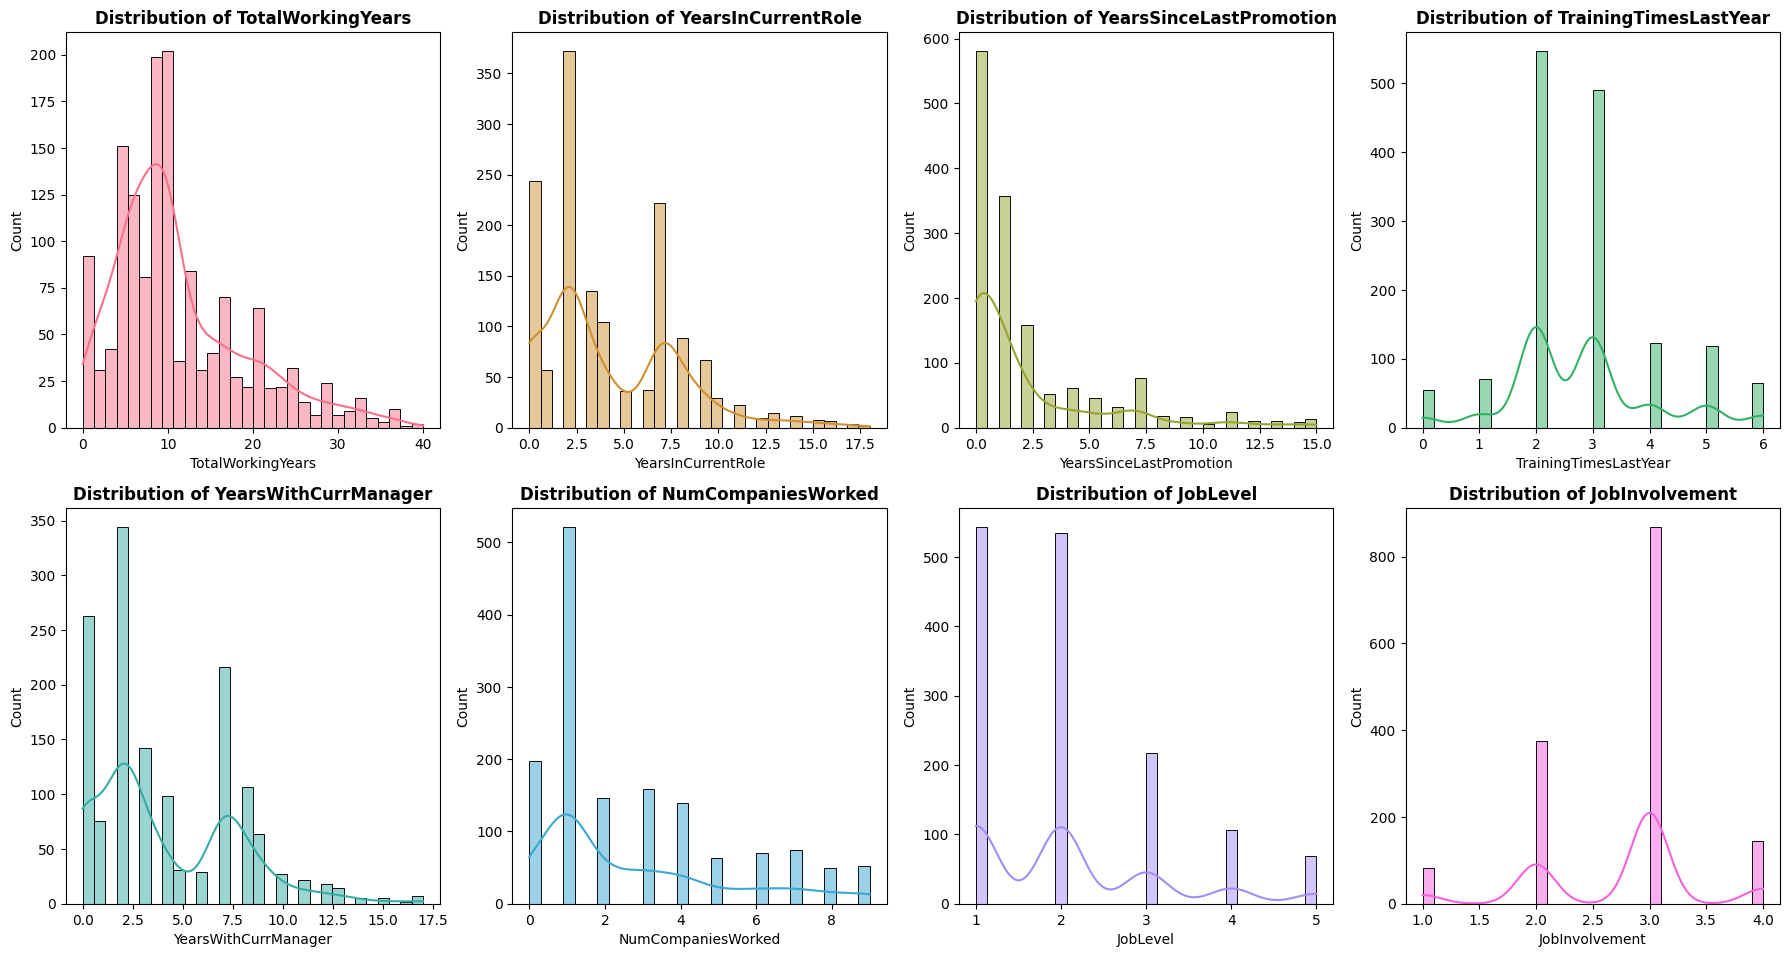

In [15]:
# Numerical columns of Univariate Analysis

# Continuous (numerical) features
continuous_features = [
    'TotalWorkingYears', 'YearsInCurrentRole', 
    'YearsSinceLastPromotion','TrainingTimesLastYear','YearsWithCurrManager',
    'NumCompaniesWorked','JobLevel','JobInvolvement'
]

# Define color palette
colors = sns.color_palette("husl", len(continuous_features))

# Determine grid size (4x4 for up to 16 features)
rows, cols = 3, 4
fig, axes = plt.subplots(rows, cols, figsize=(18, 14))
axes = axes.flatten()

# Loop through features
for i, feature in enumerate(continuous_features):
    sns.histplot(df[feature], kde=True, bins=30, color=colors[i], ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}', fontsize=12, fontweight='bold')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')

# Remove unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


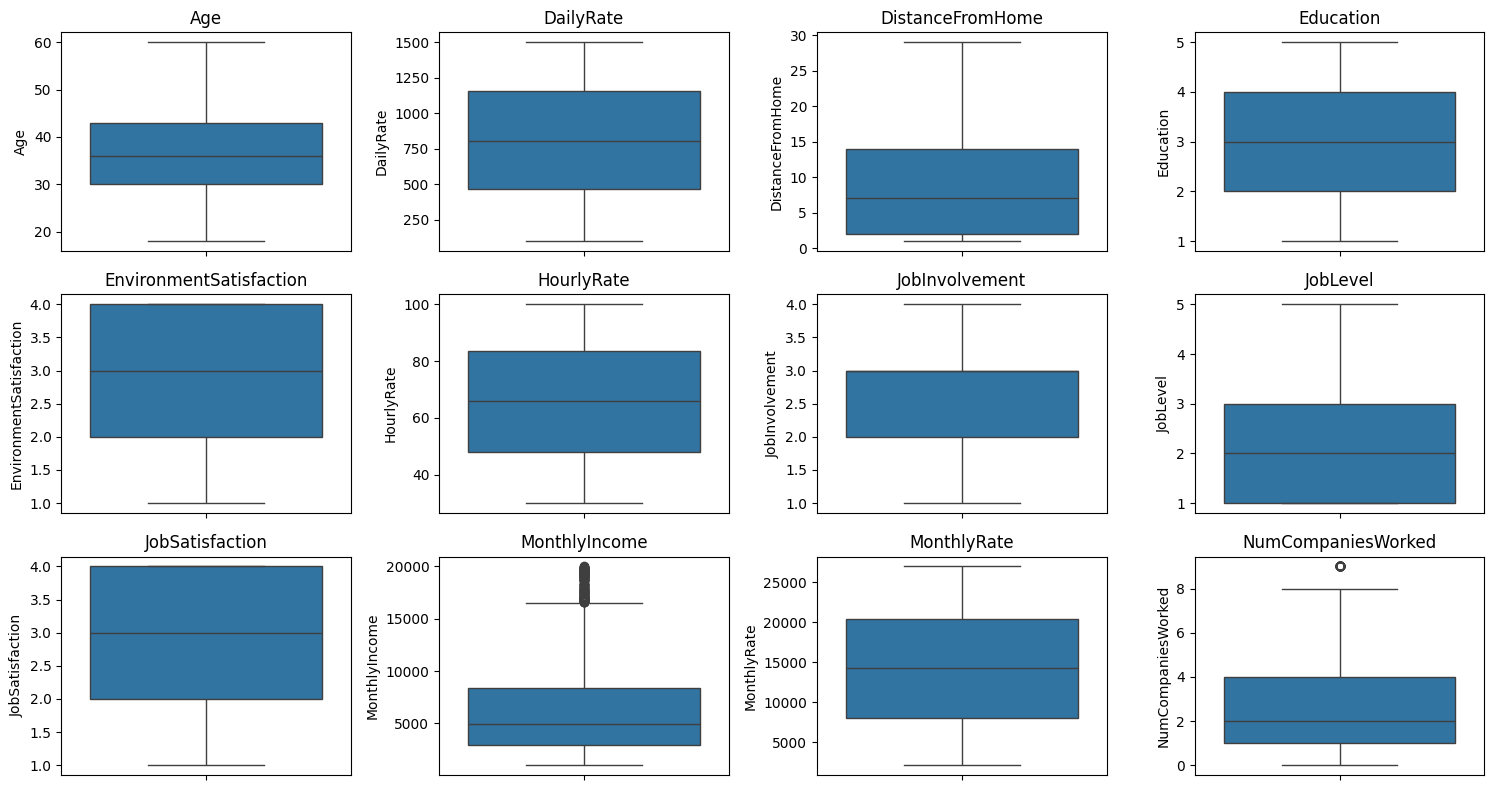

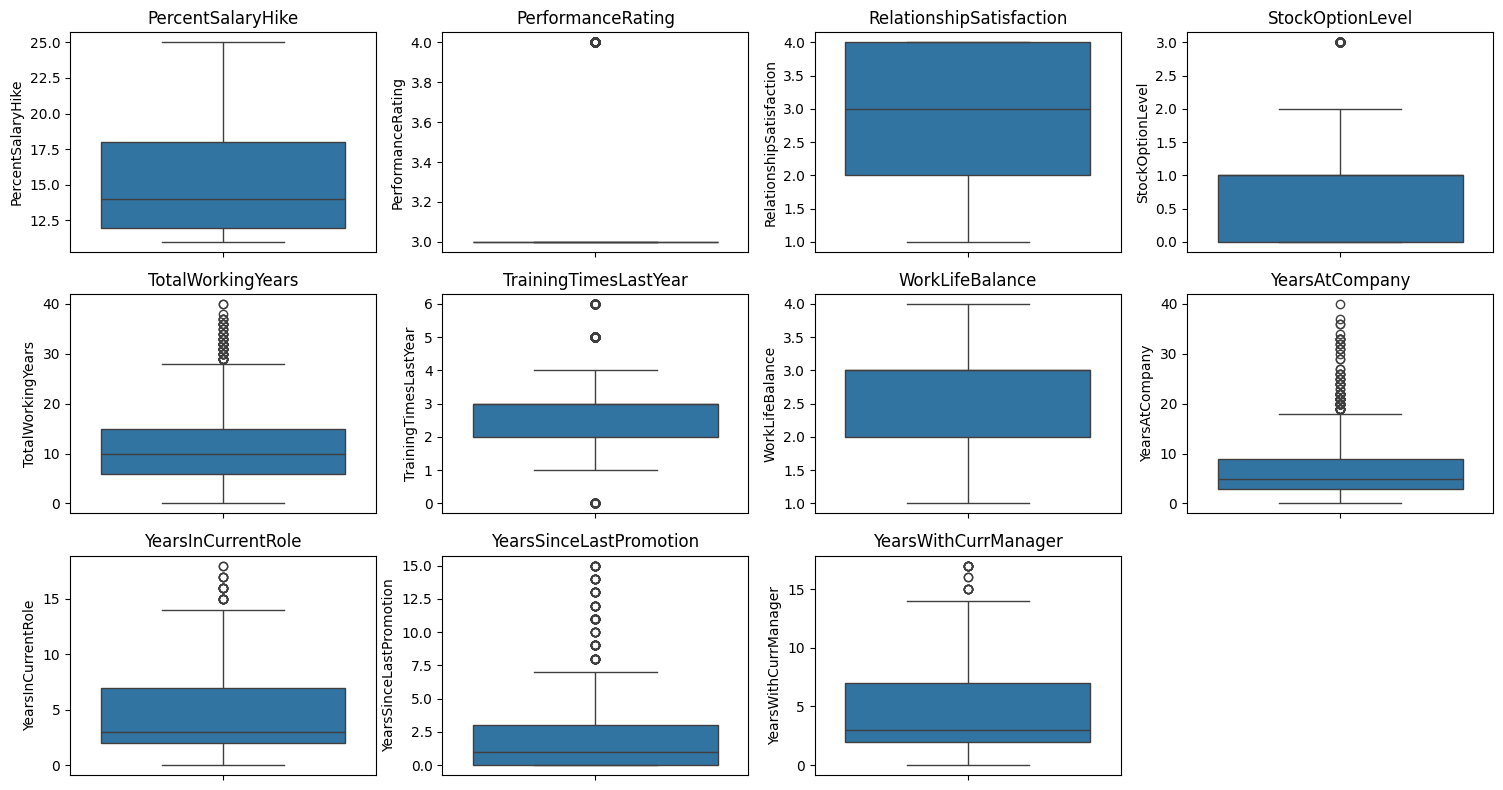

In [16]:
import math

# Batch size (number of plots per page)
batch_size = 12
total_cols = len(numerical_cols)
num_batches = math.ceil(total_cols / batch_size)

# Plot in batches
for batch in range(num_batches):
    start = batch * batch_size
    end = start + batch_size
    cols_to_plot = numerical_cols[start:end]

    plt.figure(figsize=(15, 8))
    
    for i, col in enumerate(cols_to_plot):
        plt.subplot(3, 4, i + 1)
        sns.boxplot(y=df[col])
        plt.title(col)
    
    plt.tight_layout()
    plt.show()

In [17]:
# Detecting outliers

cols_to_check = ['MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany', 'TrainingTimesLastYear',
                 'YearsInCurrentRole',  'YearsWithCurrManager']

outlier_summary = {}

for col in cols_to_check:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # detect outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    outlier_summary[col] = {
        'Lower_Bound': lower_bound,
        'Upper_Bound': upper_bound,
        'Num_Outliers': len(outliers)
    }

outlier_df = pd.DataFrame(outlier_summary).T
print(outlier_df)


                       Lower_Bound  Upper_Bound  Num_Outliers
MonthlyIncome              -5291.0      16581.0         114.0
TotalWorkingYears             -7.5         28.5          63.0
YearsAtCompany                -6.0         18.0         104.0
TrainingTimesLastYear          0.5          4.5         238.0
YearsInCurrentRole            -5.5         14.5          21.0
YearsWithCurrManager          -5.5         14.5          14.0


In [18]:
#Cap the Outliers

cols_to_cap = ['MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany', 'TrainingTimesLastYear',
               'YearsInCurrentRole', 'YearsWithCurrManager']

for col in cols_to_cap:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    
    df[col] = df[col].clip(upper=upper_bound)


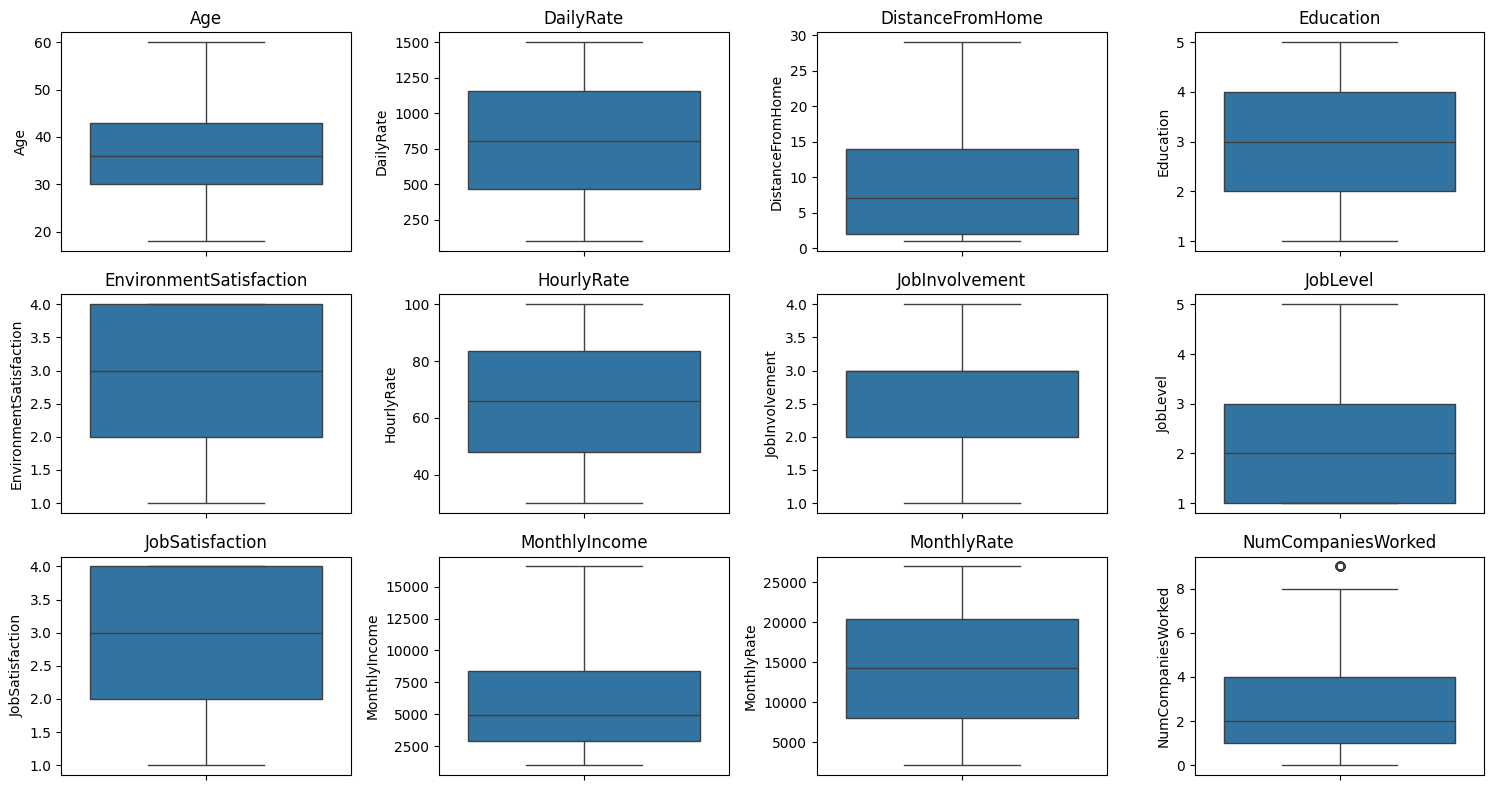

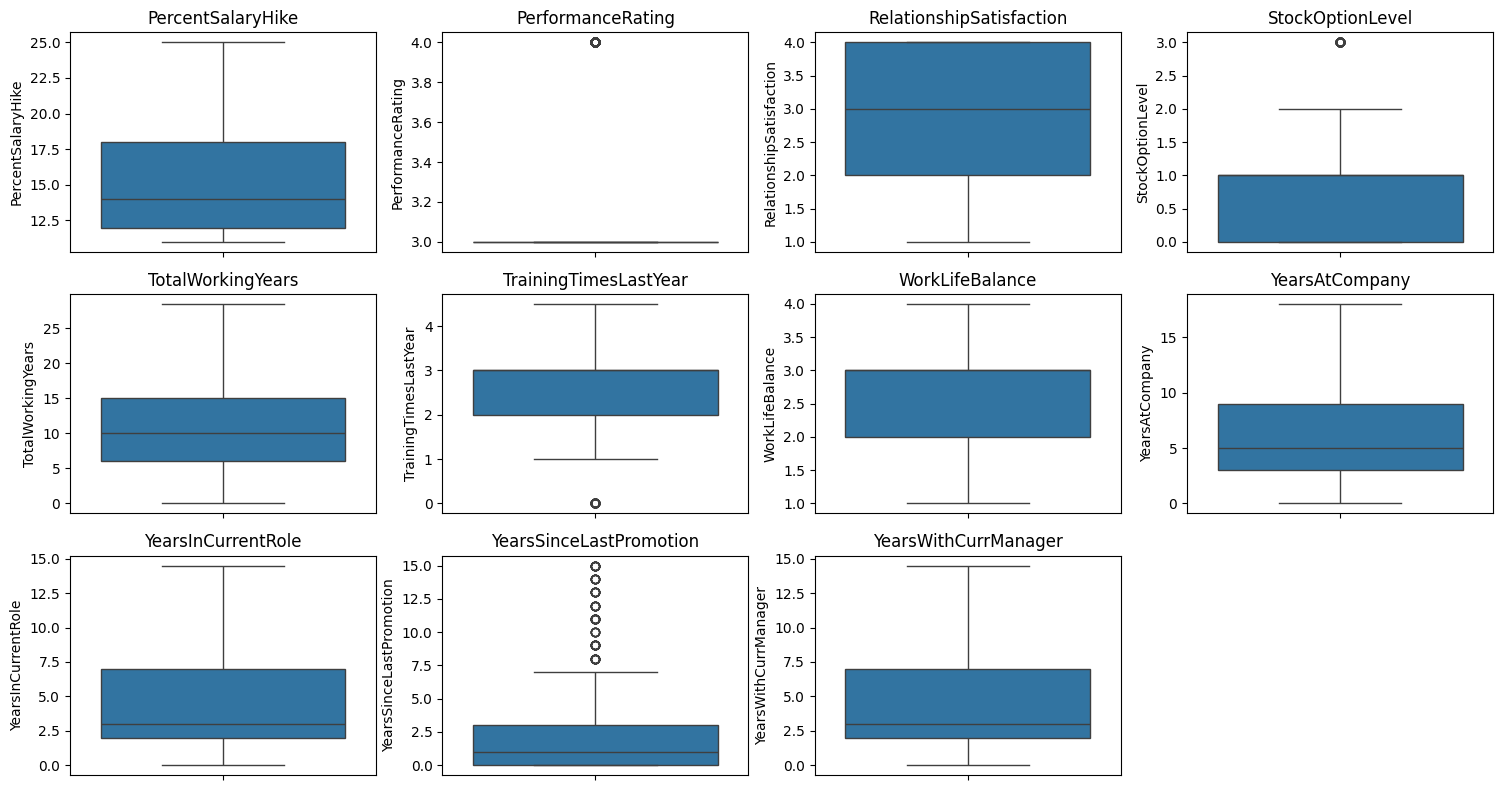

In [19]:
import math

# Batch size (number of plots per page)
batch_size = 12
total_cols = len(numerical_cols)
num_batches = math.ceil(total_cols / batch_size)

# Plot in batches
for batch in range(num_batches):
    start = batch * batch_size
    end = start + batch_size
    cols_to_plot = numerical_cols[start:end]

    plt.figure(figsize=(15, 8))
    
    for i, col in enumerate(cols_to_plot):
        plt.subplot(3, 4, i + 1)
        sns.boxplot(y=df[col])
        plt.title(col)
    
    plt.tight_layout()
    plt.show()

In [20]:
df['YearsSinceLastPromotion'].unique()

array([ 0,  1,  3,  2,  7,  4,  8,  6,  5, 15,  9, 13, 12, 10, 11, 14])

In [21]:
df['YearsSinceLastPromotion'].nunique()

16

In [22]:
df['YearsSinceLastPromotion'].value_counts()

YearsSinceLastPromotion
0     581
1     357
2     159
7      76
4      61
3      52
5      45
6      32
11     24
8      18
9      17
15     13
13     10
12     10
14      9
10      6
Name: count, dtype: int64

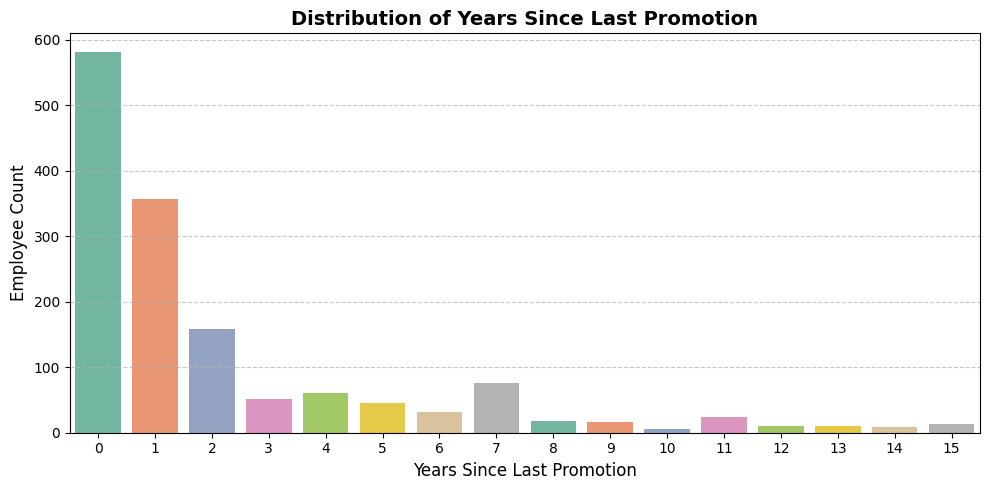

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of target variable
plt.figure(figsize=(10, 5))
sns.countplot(x='YearsSinceLastPromotion', hue='YearsSinceLastPromotion', data=df, palette='Set2',  legend=False)

# Set all years from 0 to 15 explicitly
plt.xticks(ticks=range(0, 16), labels=range(0, 16))
plt.xlabel('Years Since Last Promotion', fontsize=12)
plt.ylabel('Employee Count', fontsize=12)
plt.title('Distribution of Years Since Last Promotion', fontsize=14, fontweight='bold')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


- Since our goal is to predict the likelihood of an employee getting promoted soon, we are interested in a categorical outcome — whether an employee is likely to be promoted (Yes) or not likely to be promoted (No).

- Therefore, we convert the continuous target variable YearsSinceLastPromotion into a binary classification label, PromotionSoon, using a threshold.

- Specifically, employees who have not been promoted in the last 5 years or less are labeled as PromotionSoon = 1 (indicating a likely promotion soon), while those with more than 5 years since their last promotion are labeled as PromotionSoon = 0 (indicating not soon).

In [24]:
df['PromotionSoon'] = df['YearsSinceLastPromotion'].apply(lambda x: 1 if x <= 5 else 0)


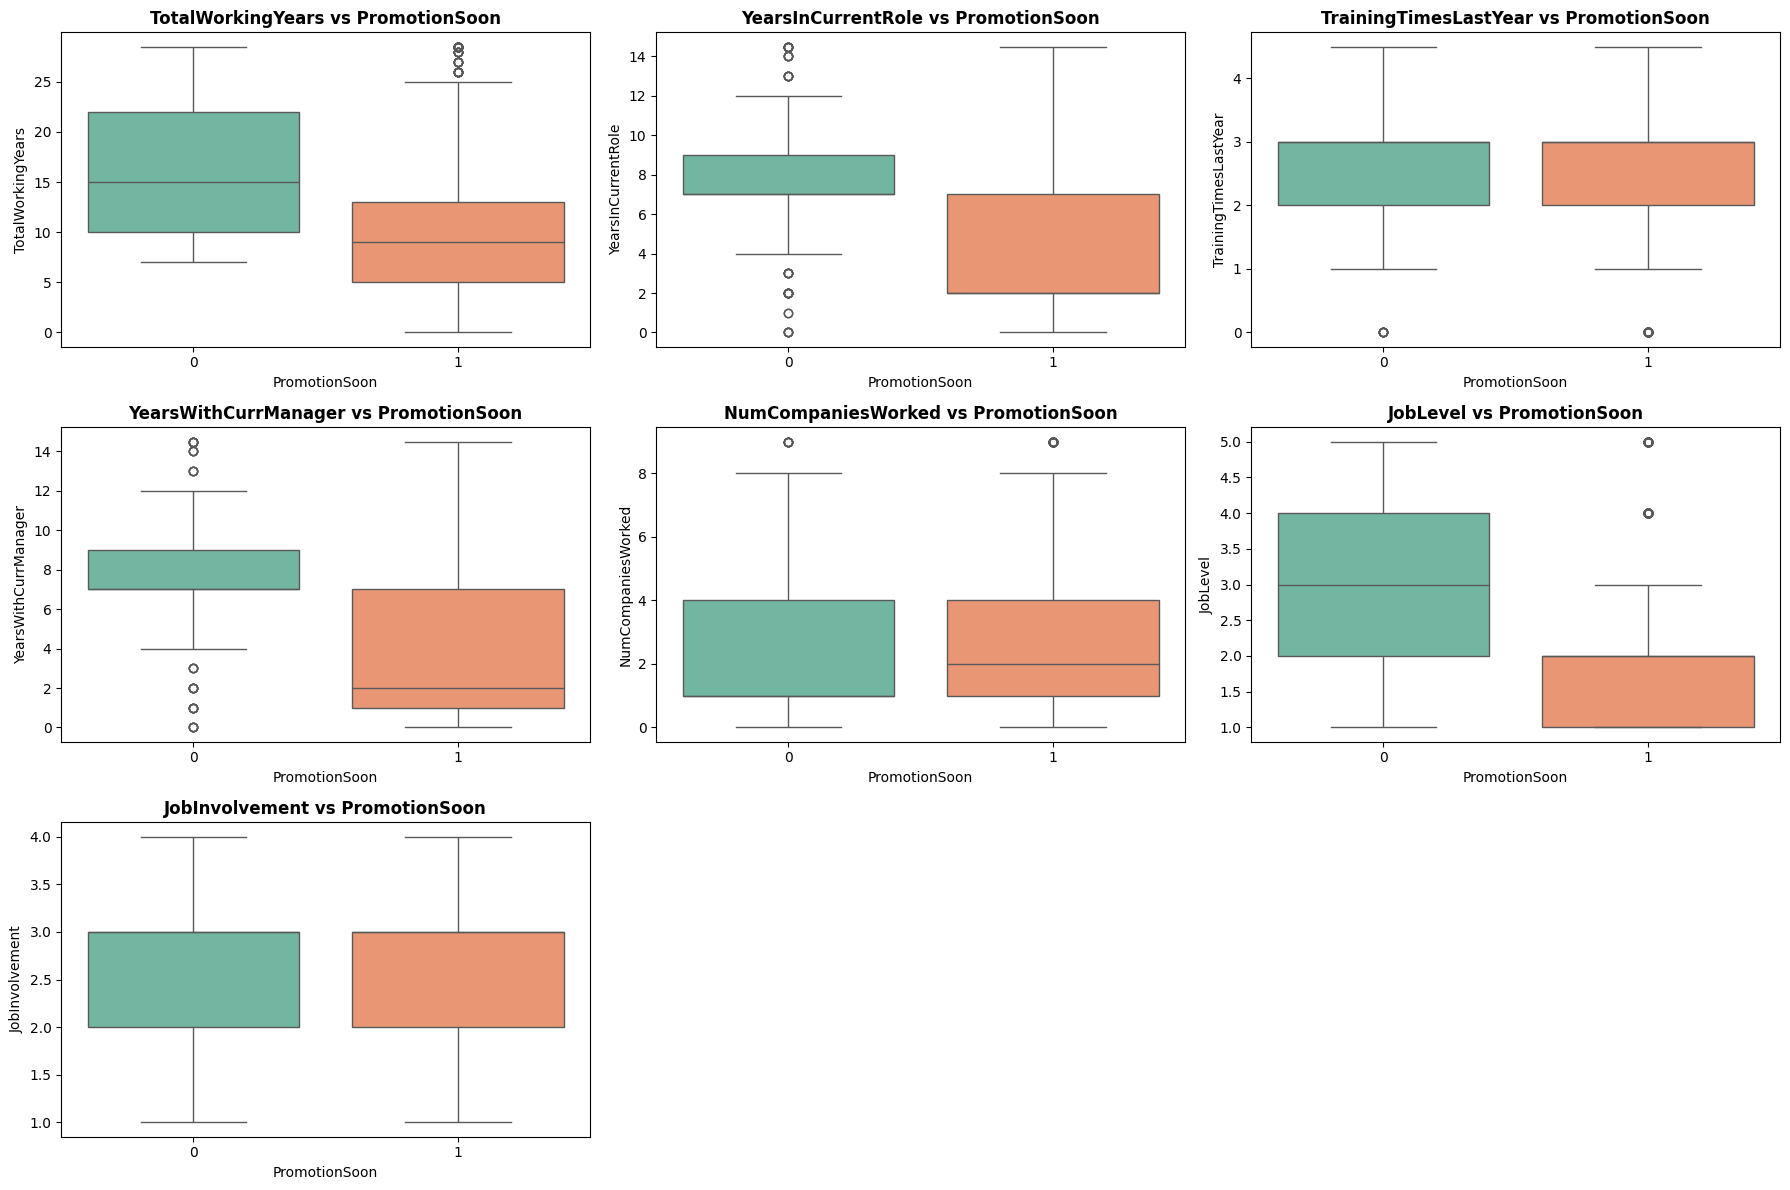

In [25]:
# Numerical columns vs PromotionSoon

import seaborn as sns
import matplotlib.pyplot as plt

# Numerical columns to analyze
continuous_features = [
    'TotalWorkingYears', 'YearsInCurrentRole', 
    'TrainingTimesLastYear',
    'YearsWithCurrManager', 'NumCompaniesWorked',
    'JobLevel', 'JobInvolvement'
]

# Define exact 2-color palette for PromotionSoon = [0, 1]
hue_colors = sns.color_palette("Set2", 2)  # Only 2 colors

# Define grid layout
rows, cols = 3, 3
fig, axes = plt.subplots(rows, cols, figsize=(18, 12))
axes = axes.flatten()

# Plot each boxplot
for i, col in enumerate(continuous_features):
    sns.boxplot(
        x='PromotionSoon', 
        y=col, 
        data=df, 
        hue='PromotionSoon',           # Explicitly assign hue
        palette=hue_colors, 
        legend=False, 
        ax=axes[i]
    )
    axes[i].set_title(f"{col} vs PromotionSoon", fontsize=12, fontweight='bold')
    axes[i].set_xlabel("PromotionSoon")
    axes[i].set_ylabel(col)

# Remove unused subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



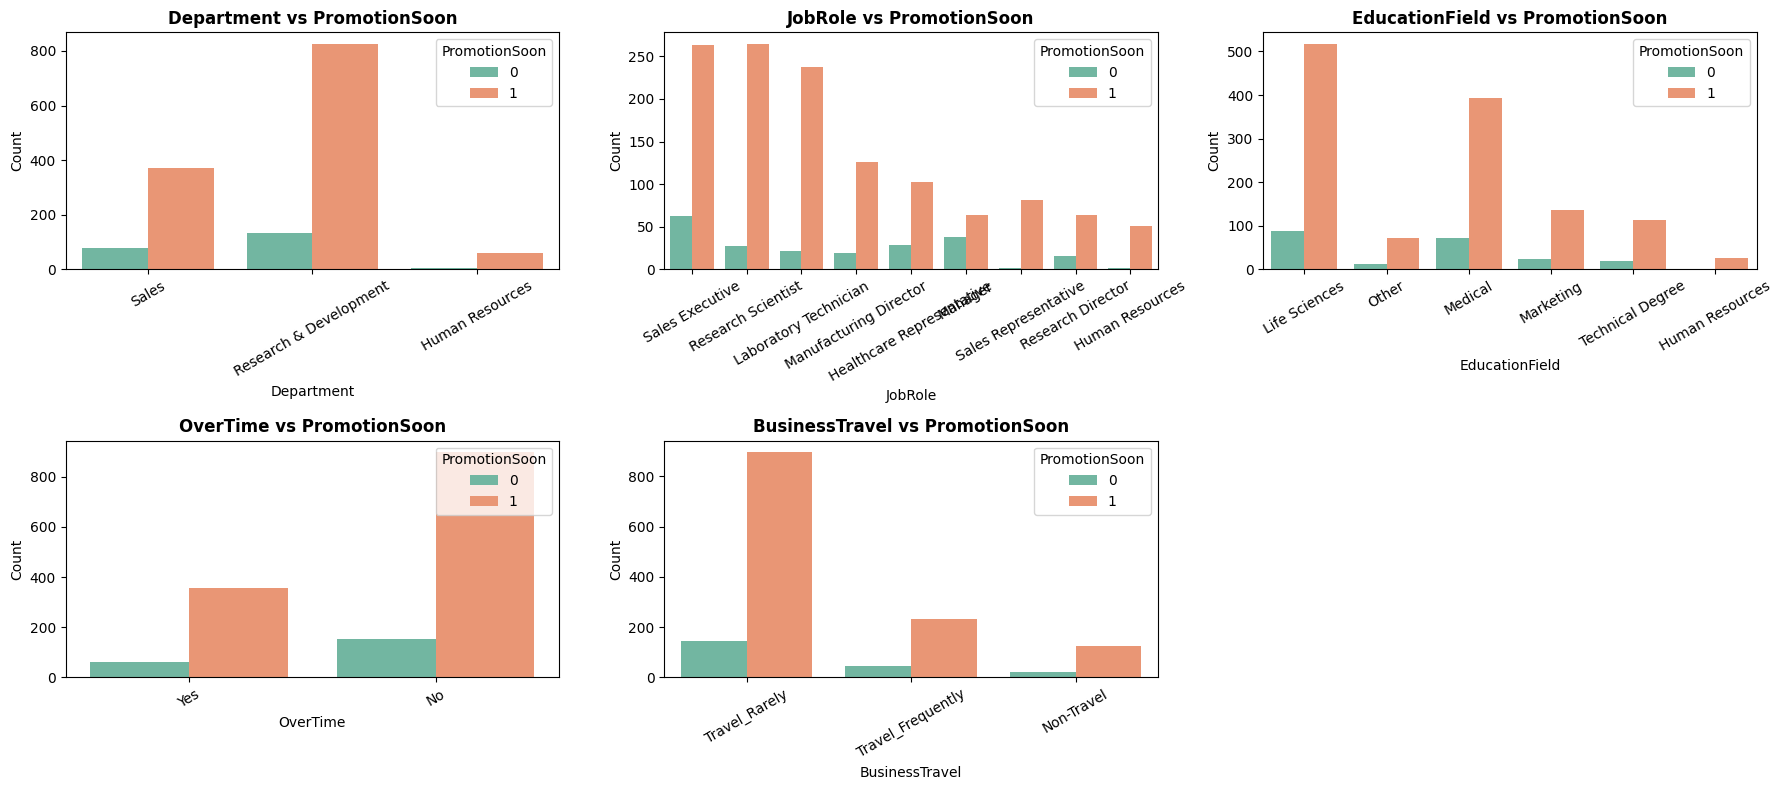

In [26]:
#Categorical columns vs PromotionSoon

import seaborn as sns
import matplotlib.pyplot as plt

# Categorical columns
cat_cols = ['Department', 'JobRole', 'EducationField', 'OverTime', 'BusinessTravel']

# Define color palette for PromotionSoon classes (e.g., 0 = No, 1 = Yes)
hue_colors = sns.color_palette("Set2", 2)

# Define grid layout (2 rows x 3 cols fits 5 plots neatly)
rows, cols = 2, 3
fig, axes = plt.subplots(rows, cols, figsize=(18, 8))
axes = axes.flatten()

# Loop through each categorical column
for i, col in enumerate(cat_cols):
    sns.countplot(x=col, hue='PromotionSoon', data=df, palette=hue_colors, ax=axes[i])
    axes[i].set_title(f"{col} vs PromotionSoon", fontsize=12, fontweight='bold')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x', rotation=30)
    axes[i].legend(title='PromotionSoon', loc='upper right')

# Remove any unused subplots (if fewer than grid cells)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


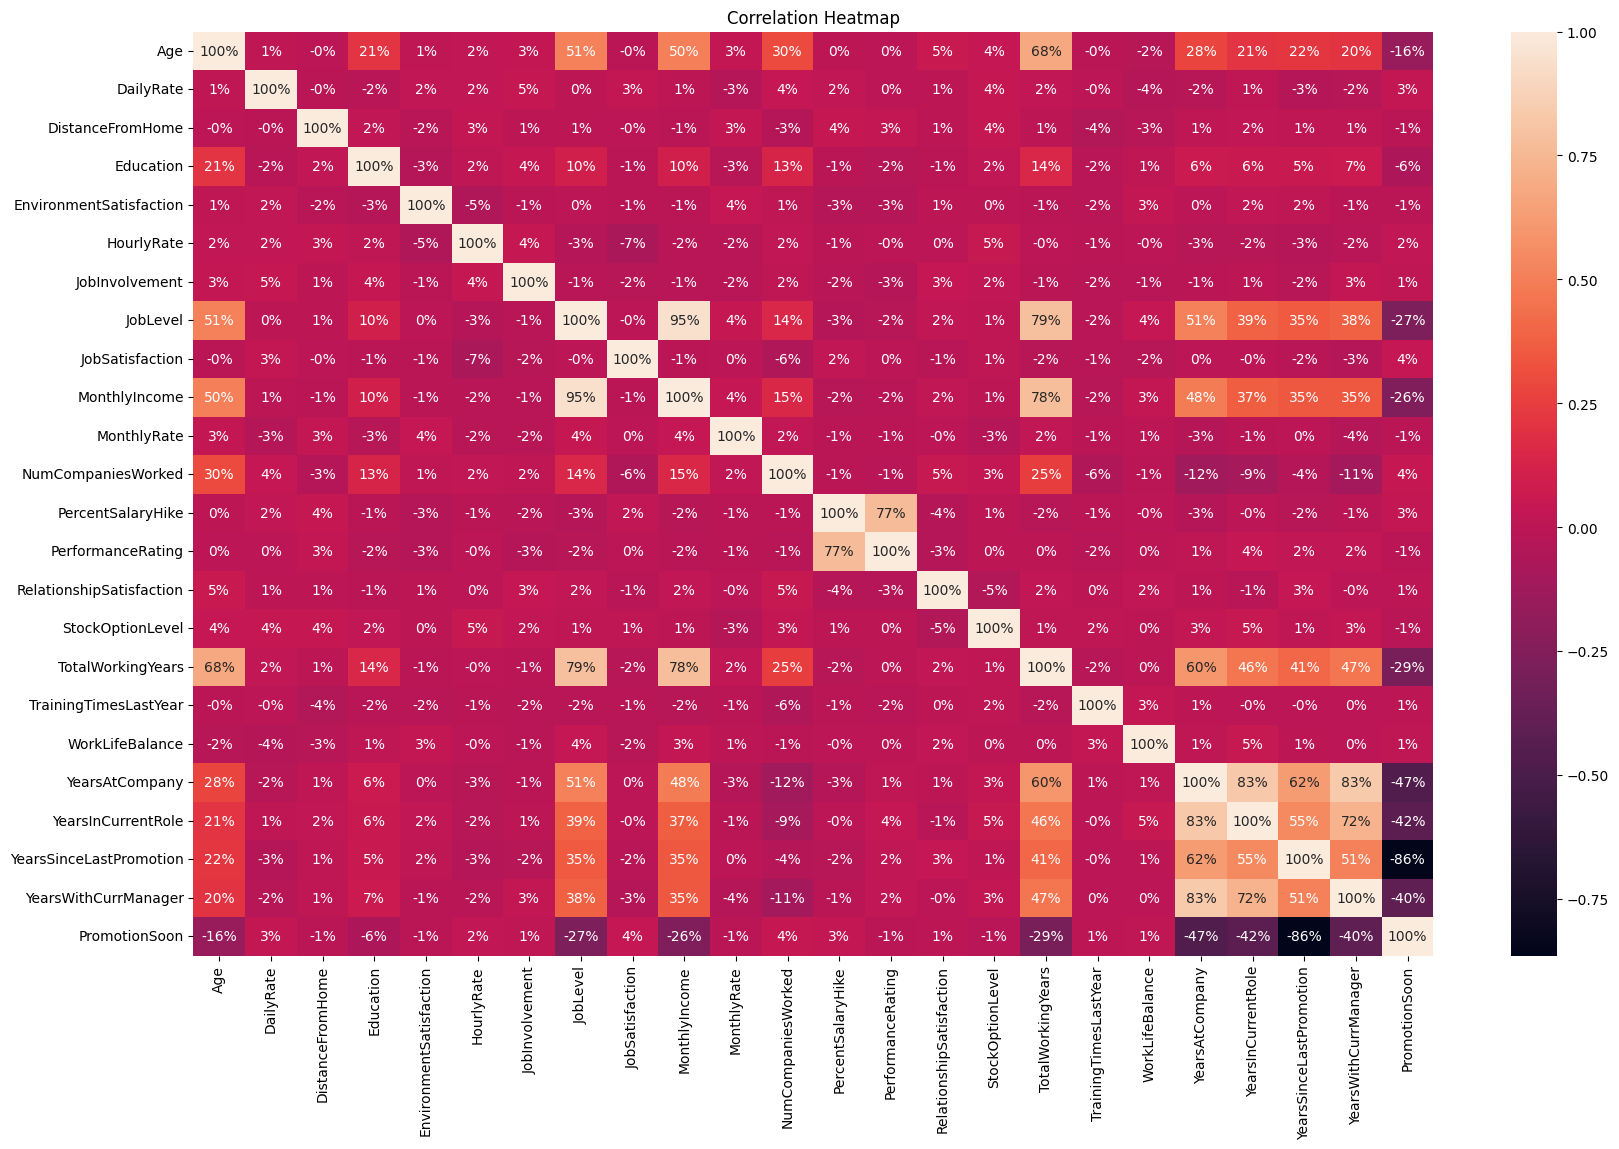

Correlation of features with PromotionSoon:


PromotionSoon               1.000000
NumCompaniesWorked          0.039346
JobSatisfaction             0.036046
DailyRate                   0.030637
PercentSalaryHike           0.029491
HourlyRate                  0.018908
JobInvolvement              0.010651
WorkLifeBalance             0.009986
TrainingTimesLastYear       0.007826
RelationshipSatisfaction    0.005580
MonthlyRate                -0.005509
EnvironmentSatisfaction    -0.006730
DistanceFromHome           -0.010122
PerformanceRating          -0.010384
StockOptionLevel           -0.014276
Education                  -0.063407
Age                        -0.156919
MonthlyIncome              -0.261068
JobLevel                   -0.271836
TotalWorkingYears          -0.294475
YearsWithCurrManager       -0.404807
YearsInCurrentRole         -0.415083
YearsAtCompany             -0.471700
YearsSinceLastPromotion    -0.863935
Name: PromotionSoon, dtype: float64

In [27]:
corr = df.corr(numeric_only=True)

df_numeric = df.select_dtypes(include='number')
plt.figure(figsize=(20,12))
sns.heatmap(df_numeric.corr(),annot=True,fmt='.0%')
plt.title('Correlation Heatmap')
plt.show()

# Show features most correlated with PromotionSoon
print("Correlation of features with PromotionSoon:")
corr['PromotionSoon'].sort_values(ascending=False)


In [28]:
df['PromotionSoon'].unique()

array([1, 0])

In [29]:
df['PromotionSoon'].nunique()

2

In [30]:
df['PromotionSoon'].value_counts()

PromotionSoon
1    1255
0     215
Name: count, dtype: int64

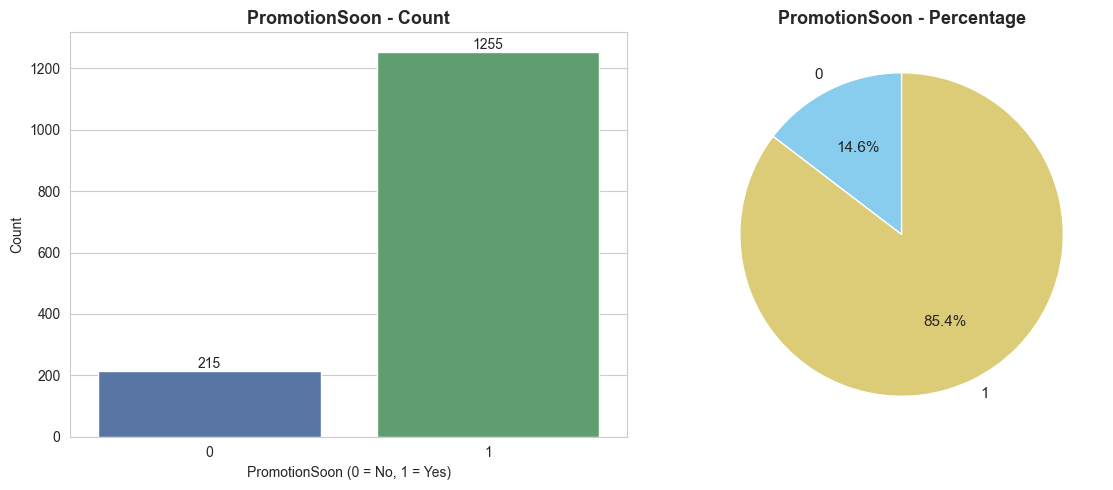

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Apply Seaborn whitegrid theme
sns.set_style("whitegrid")

# Set up 1 row, 2 columns layout
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Define custom color palettes
count_colors = ["#4C72B0", "#55A868"]   # Muted blue and green
pie_colors = ["#88CCEE", "#DDCC77"]     # Soft pastel tones

# --- Countplot (horizontal) ---
sns.countplot(
    x='PromotionSoon', 
    data=df,
    hue='PromotionSoon',                # explicit hue → avoids deprecation warning
    palette=count_colors,
    legend=False,
    ax=axes[0]
)
axes[0].set_title("PromotionSoon - Count", fontsize=13, fontweight='bold')
axes[0].set_ylabel("Count")
axes[0].set_xlabel("PromotionSoon (0 = No, 1 = Yes)")

# Add count labels on bars
for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%d', label_type='edge', fontsize=10)

# --- Pie chart ---
df['PromotionSoon'].value_counts(normalize=True).sort_index().plot.pie(
    autopct='%.1f%%',
    colors=pie_colors,
    ax=axes[1],
    startangle=90,
    wedgeprops={'edgecolor': 'white'},
    textprops={'fontsize': 11}
)
axes[1].set_title("PromotionSoon - Percentage", fontsize=13, fontweight='bold')
axes[1].set_ylabel("")  # remove y-label

# Layout adjustment
plt.tight_layout()
plt.show()


In [32]:
df.to_csv('D:/GUVI/project3/employee_promotion_likelihood_cleaned.csv', index=False)


#### Predicting Employee Promotion Likelihood

Goal: Predict the likelihood of an employee getting promoted.

Target Variable: PromotionSoon

In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from imblearn.combine import SMOTETomek
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [34]:
# Load dataset
# ---------------------------
df = pd.read_csv('D:/GUVI/project3/employee_promotion_likelihood_cleaned.csv')

In [35]:
feature_names = [ 'YearsInCurrentRole','NumCompaniesWorked',  'WorkLifeBalance',
    'JobLevel', 'TotalWorkingYears', 'Education', 'JobSatisfaction','PercentSalaryHike'
]
target = 'PromotionSoon'

X = df[feature_names].copy()
y = df[target]


In [36]:
# Automatically detect numeric columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Automatically detect categorical columns
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

In [37]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [38]:
# Preprocessor
# ---------------------------
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
    ],
    remainder='drop'
)

# ---------------------------
# Imbalanced sampler
# ---------------------------
sampler = SMOTETomek(random_state=42)

# ---------------------------
# Classifier
# ---------------------------
clf = RandomForestClassifier(
    n_estimators=200,
    max_depth=12,
    min_samples_split=2,
    class_weight='balanced',
    random_state=42
)


In [39]:
# Pipeline: preprocessor -> sampler -> classifier
# ---------------------------
pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('sampler', sampler),
    ('classifier', clf)
])

In [40]:
# Fit pipeline
# ---------------------------
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['YearsInCurrentRole',
                                                   'NumCompaniesWorked',
                                                   'WorkLifeBalance',
                                                   'JobLevel',
                                                   'TotalWorkingYears',
                                                   'Education',
                                                   'JobSatisfaction',
                                                   'PercentSalaryHike']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [])])),
                ('sampler', SMOTETomek(random_state=42)),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced', max_depth=12,
                                        n_estimators=200, random_state=42))])

Accuracy: 0.8605442176870748

Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.65      0.58        43
           1       0.94      0.90      0.92       251

    accuracy                           0.86       294
   macro avg       0.73      0.77      0.75       294
weighted avg       0.88      0.86      0.87       294



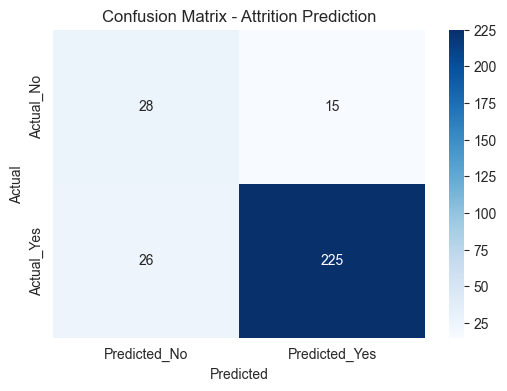

In [41]:
# Evaluate
# ---------------------------
y_pred = pipeline.predict(X_test)

# applying sigmoid probability
y_prob=pipeline.predict_proba(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


cm= confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted_No', 'Predicted_Yes'],
            yticklabels=['Actual_No', 'Actual_Yes'])
plt.title("Confusion Matrix - Attrition Prediction")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

In [42]:

from sklearn.metrics import (roc_curve, auc)
#  ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, pipeline.predict_proba(X_test)[:,1])

#  AUROC
roc_auc = auc(fpr, tpr)
print(f"AUROC: {roc_auc:.4f}")

AUROC: 0.8971


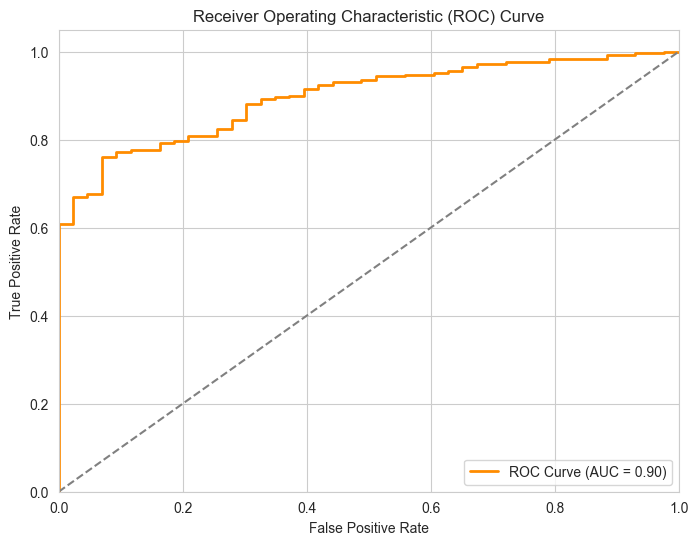

In [43]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

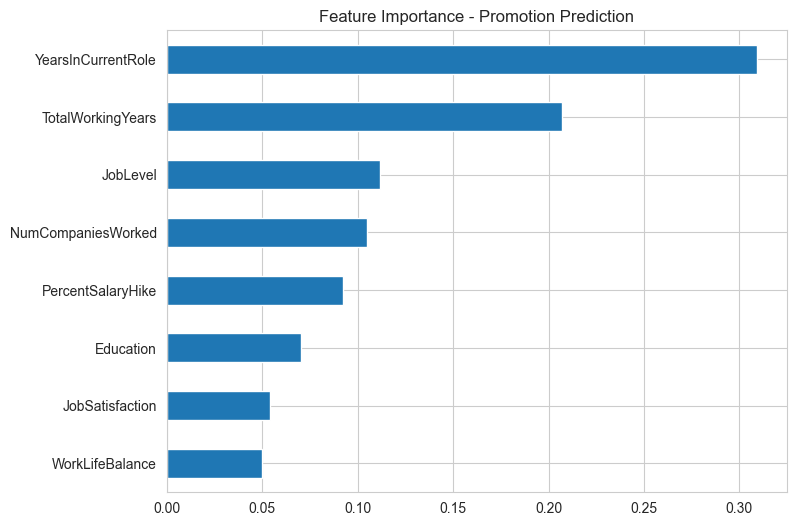

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

feat_importance = pd.Series(pipeline.named_steps['classifier'].feature_importances_, index=feature_names)
feat_importance.sort_values().plot(kind='barh', figsize=(8,6))
plt.title('Feature Importance - Promotion Prediction')
plt.show()


In [45]:
import joblib
import numpy as np

# ---------------------------
# 1) Save pipeline
# ---------------------------
save_dict = {
    'pipeline': pipeline,
    'feature_names': feature_names,
    'numeric_features': numeric_features,
    'categorical_features': categorical_features
}

joblib.dump(save_dict, "employee_promotion_pipeline.joblib")
print("Pipeline saved to 'employee_promotion_pipeline.joblib'")


Pipeline saved to 'employee_promotion_pipeline.joblib'


In [46]:
import joblib
import pandas as pd

# ---------------------------
# 1) Load saved pipeline
# ---------------------------
saved = joblib.load("employee_promotion_pipeline.joblib")
pipeline = saved['pipeline']
feature_names = saved['feature_names']

# ---------------------------
# 2) Example employee data
# ---------------------------
sample_employee = pd.DataFrame([{
    'YearsInCurrentRole': 5,
    'NumCompaniesWorked': 4,
    'WorkLifeBalance': 3,
    'JobLevel': 2,
    'TotalWorkingYears': 8,
    'Education': 3,
    'JobSatisfaction': 2,
    'PercentSalaryHike': 20
}])

# ---------------------------
# 3) Predict class
# ---------------------------
pred_class = pipeline.predict(sample_employee)[0]

# ---------------------------
# 4) Predict probabilities
# ---------------------------
pred_proba = pipeline.predict_proba(sample_employee)[0]

# ---------------------------
# 5) Show detailed result
# ---------------------------
print("----- Employee Promotion Prediction -----")
print(f"Predicted PromotionSoon: {'Yes' if pred_class == 1 else 'No'}")
print(f"Probability of PromotionSoon (Yes): {pred_proba[1]*100:.2f}%")
print(f"Probability of Not Soon (No): {pred_proba[0]*100:.2f}%")

print("\nEmployee Details:")
for col in sample_employee.columns:
    print(f"  {col}: {sample_employee[col].values[0]}")


----- Employee Promotion Prediction -----
Predicted PromotionSoon: Yes
Probability of PromotionSoon (Yes): 80.10%
Probability of Not Soon (No): 19.90%

Employee Details:
  YearsInCurrentRole: 5
  NumCompaniesWorked: 4
  WorkLifeBalance: 3
  JobLevel: 2
  TotalWorkingYears: 8
  Education: 3
  JobSatisfaction: 2
  PercentSalaryHike: 20
